In [509]:
import pandas as pd
import numpy as np

In [510]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline

In [511]:
df = pd.read_csv('data/final_cleaned_data.csv')

In [512]:
df = df.drop('Unnamed: 0', axis = 1)

In [513]:
df.shape

(10079, 5)

In [514]:
df.isna().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [515]:
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [516]:
df.describe()

,total_sqft,bath,price,BHK
count,10079.000000,10079.000000,10079.000000,10079.000000
mean,1464.412710,2.399444,88.061159,2.499057
std,753.633493,0.813890,77.943243,0.711216
min,300.000000,1.000000,10.000000,1.000000
25%,1101.000000,2.000000,48.450000,2.000000
50%,1275.000000,2.000000,66.000000,2.000000
75%,1616.000000,3.000000,98.000000,3.000000
max,30000.000000,8.000000,2100.000000,4.000000


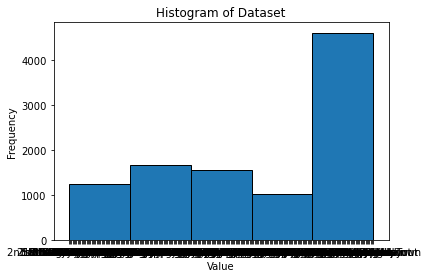

In [517]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['location'], bins=5, edgecolor='black')
plt.title('Histogram of Dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [518]:
# Create X and y variables
X = df.drop(columns=['price'])
y = df['price']

In [519]:
transformer = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder='passthrough')
scaler = MinMaxScaler()

In [520]:
p = make_pipeline(transformer, scaler)

In [521]:
X = p.fit_transform(X)

In [522]:
X.shape

(10079, 245)

In [523]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [525]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
print(r2_score(y_test, ypred))

0.8725430013125745


## Evaluate model 

In [470]:
def eval_model(true, predicted):
    r2Score = r2_score(true,predicted)
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    
    return r2Score, mse, mae
    

## Train the model

In [471]:
models = {
    'Linear_regression': LinearRegression(),
    'Lasso_regression': Lasso(),
    'Random_forest': RandomForestRegressor()
    
}

model_list = list(models.values())
for i in range(len(list(models))):
    model = list(models.values())[i]
    pipeline = make_pipeline(transformer, scaler, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2Score, mse, mae = eval_model(y_test, y_pred)
    
    print(list(models.keys())[i])
    
    print(f'Model performance for Test set for model {i}')
    print("- Root Mean Squared Error: {:.4f}".format(mse))
    print("- Mean Absolute Error: {:.4f}".format(mae))
    print("- R2 Score: {:.4f}".format(r2Score))
    print('='*35)
    print('\n')
    
    
    

Linear_regression
Model performance for Test set for model 0
- Root Mean Squared Error: 1105.0985
- Mean Absolute Error: 19.1067
- R2 Score: 0.8726


Lasso_regression
Model performance for Test set for model 1
- Root Mean Squared Error: 1183.6679
- Mean Absolute Error: 20.3944
- R2 Score: 0.8635


Random_forest
Model performance for Test set for model 2
- Root Mean Squared Error: 1867.5570
- Mean Absolute Error: 17.0299
- R2 Score: 0.7846


